In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
# train_data = pd.read_csv('data/train_df.csv')
# test_data = pd.read_csv('data/test_df.csv')
#
# df = pd.concat([train_data, test_data], axis=0)
# df.to_csv('data/init.csv', index=False)

# list_train = train_data.columns.tolist()
# list_train[0] = ''
# train_data.columns = list_train
# train_data.set_index('', inplace=True)

df1 = pd.read_csv('data/only2_big_with_sf.csv')
df = df1[['1462', '200916', '254158', '54442', '54851', '1876', '55175', '2826', '64714', '1995', '132946', '10921', '9294', 'SF']]
list_test = df.columns.tolist()
list_test[0] = ''
df.columns = list_test
df.set_index('', inplace=True)


In [85]:
df.head()

,200916,254158,54442,54851,1876,55175,2826,64714,1995,132946,10921,9294,SF
,,,,,,,,,,,,,
0.070389,6.222264,0.163499,4.599318,4.646739,4.450881,2.084064,0.250962,1.117695,0.014355,0.000000,7.522542,1.855990,0.607940
0.263034,5.252098,0.176323,4.353323,4.262283,2.920293,1.996389,0.622930,0.765535,0.028569,0.411426,5.910253,0.887525,0.573035
0.263034,6.221684,0.124328,5.343052,3.693766,4.763943,2.659925,0.948601,2.735522,0.056584,0.028569,7.650334,1.304511,0.450188
0.855990,6.929554,0.097611,4.624101,3.956057,4.495695,2.767655,1.056584,0.678072,0.042644,0.137504,7.461479,1.575312,0.526517
3.354734,7.391458,0.042644,4.286142,3.277985,4.212569,2.319040,1.372952,0.941106,0.028569,0.097611,7.592382,0.722466,0.625161


<AxesSubplot:xlabel='SF', ylabel='count'>

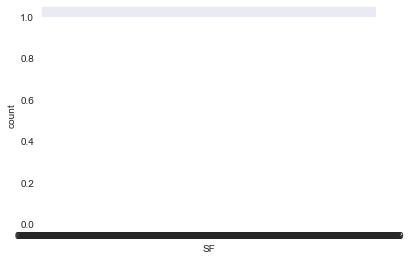

In [86]:
sns.countplot(x = 'SF', data=df)

In [87]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [88]:
y


0.070389    0.607940
0.263034    0.573035
0.263034    0.450188
0.855990    0.526517
3.354734    0.625161
              ...   
0.056584    0.378958
5.690696    0.619917
0.263034    0.346245
0.263034    0.954214
0.137504    0.607771
Name: SF, Length: 525, dtype: float64

In [89]:
# Train - Test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=69)
# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=21)

In [90]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [91]:
def get_class_distribution(obj):
    count_dict = {
        "rating_3": 0,
        "rating_4": 0,
        "rating_5": 0,
        "rating_6": 0,
        "rating_7": 0,
        "rating_8": 0,
    }

    for i in obj:
        if i == 3:
            count_dict['rating_3'] += 1
        elif i == 4:
            count_dict['rating_4'] += 1
        elif i == 5:
            count_dict['rating_5'] += 1
        elif i == 6:
            count_dict['rating_6'] += 1
        elif i == 7:
            count_dict['rating_7'] += 1
        elif i == 8:
            count_dict['rating_8'] += 1
        else:
            print("Check classes.")

    return count_dict

Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check classes.
Check clas

Text(0.5, 1.0, 'Class Distribution in Test Set')

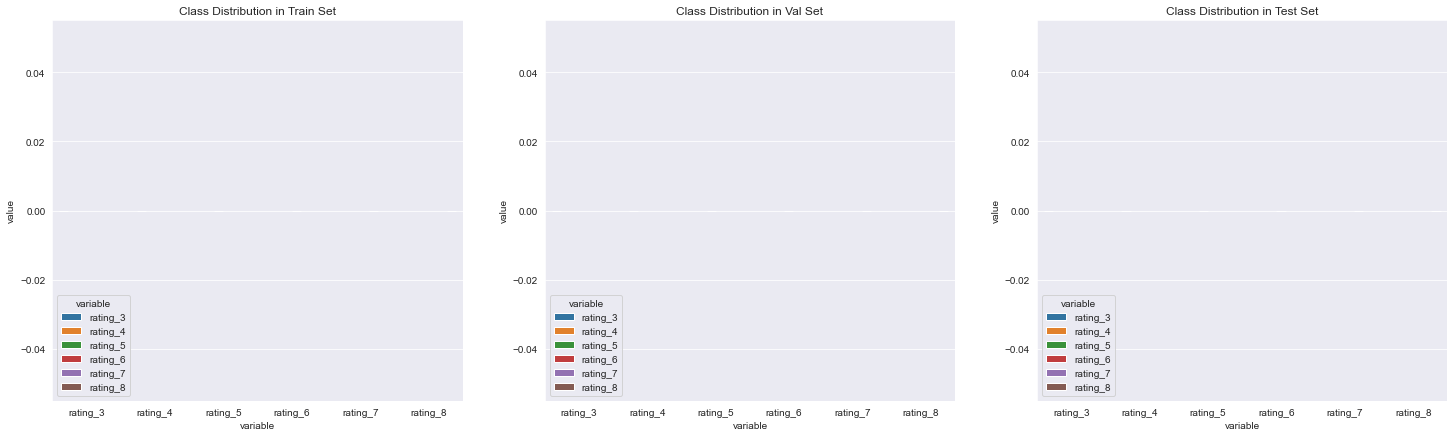

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,7))
# Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Class Distribution in Train Set')
# Val
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_val)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Val Set')
# Test
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_test)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[2]).set_title('Class Distribution in Test Set')

In [93]:
y_train, y_test, y_val = y_train.astype(float), y_test.astype(float), y_val.astype(float)

In [94]:
class RegressionDataset(Dataset):

    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)
train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
val_dataset = RegressionDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

In [95]:
EPOCHS = 500
BATCH_SIZE = 64
LEARNING_RATE = 0.001
NUM_FEATURES = len(X.columns)

In [96]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [97]:
class MultipleRegression(nn.Module):
    def __init__(self, num_features):
        super(MultipleRegression, self).__init__()

        self.layer_1 = nn.Linear(num_features, 16)
        self.layer_2 = nn.Linear(16, 32)
        self.layer_3 = nn.Linear(32, 16)
        self.layer_out = nn.Linear(16, 1)

        self.relu = nn.ReLU()
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return(x)
    def predict(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return (x)

In [98]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [99]:
model = MultipleRegression(NUM_FEATURES)
model.to(device)
print(model)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

MultipleRegression(
  (layer_1): Linear(in_features=12, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=16, bias=True)
  (layer_out): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


In [100]:
loss_stats = {
    'train': [],
    "val": []
}

In [101]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):

    # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()

        y_train_pred = model(X_train_batch)

        train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))

        train_loss.backward()
        optimizer.step()

        train_epoch_loss += train_loss.item()


    # VALIDATION
    with torch.no_grad():

        val_epoch_loss = 0

        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)

            y_val_pred = model(X_val_batch)

            val_loss = criterion(y_val_pred, y_val_batch.unsqueeze(1))

            val_epoch_loss += val_loss.item()
        loss_stats['train'].append(train_epoch_loss/len(train_loader))
        loss_stats['val'].append(val_epoch_loss/len(val_loader))

    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')

Begin training.


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.58392 | Val Loss: 0.52228
Epoch 002: | Train Loss: 0.50468 | Val Loss: 0.44760
Epoch 003: | Train Loss: 0.43299 | Val Loss: 0.37797
Epoch 004: | Train Loss: 0.35951 | Val Loss: 0.30518
Epoch 005: | Train Loss: 0.28703 | Val Loss: 0.22823
Epoch 006: | Train Loss: 0.20715 | Val Loss: 0.15758
Epoch 007: | Train Loss: 0.14093 | Val Loss: 0.09891
Epoch 008: | Train Loss: 0.08553 | Val Loss: 0.06163
Epoch 009: | Train Loss: 0.05863 | Val Loss: 0.05373
Epoch 010: | Train Loss: 0.05102 | Val Loss: 0.05732
Epoch 011: | Train Loss: 0.05172 | Val Loss: 0.05550
Epoch 012: | Train Loss: 0.04945 | Val Loss: 0.05247
Epoch 013: | Train Loss: 0.05028 | Val Loss: 0.05120
Epoch 014: | Train Loss: 0.04923 | Val Loss: 0.05030
Epoch 015: | Train Loss: 0.04751 | Val Loss: 0.04954
Epoch 016: | Train Loss: 0.04708 | Val Loss: 0.04902
Epoch 017: | Train Loss: 0.04686 | Val Loss: 0.04842
Epoch 018: | Train Loss: 0.04506 | Val Loss: 0.04762
Epoch 019: | Train Loss: 0.04347 | Val Loss: 0

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

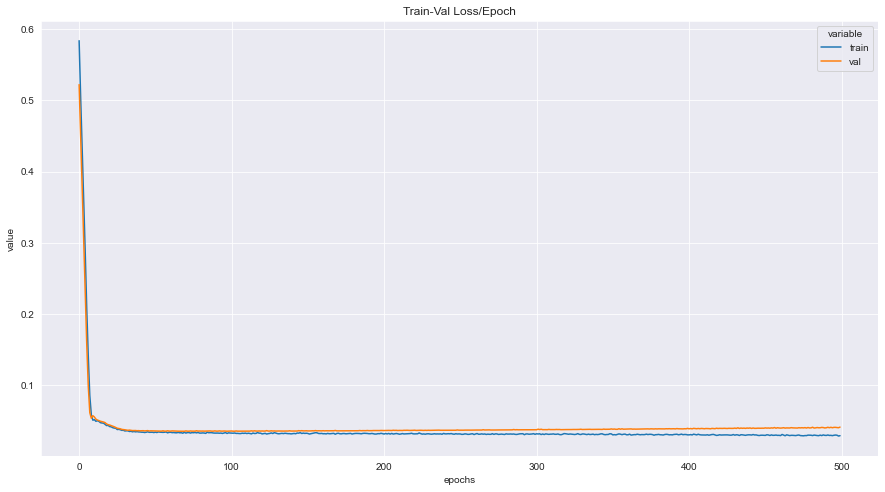

In [102]:
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
plt.figure(figsize=(15,8))
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')

In [103]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_list.append(y_test_pred.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [104]:
print(X_batch.tolist()[0])
y_pred_df = pd.DataFrame(y_pred_list, columns=['y_pred'])
y_pred_df.to_csv('data/y_pred_df.csv', index=False)

[0.4154752194881439, 0.07777447253465652, 0.7263153791427612, 0.49081069231033325, 0.6130114793777466, 0.3213530480861664, 0.22033526003360748, 0.01080984529107809, 0.012005317956209183, 0.12634903192520142, 0.6051896214485168, 0.23815631866455078]


In [105]:
mse = mean_squared_error(y_test, y_pred_list)
r_square = r2_score(y_test, y_pred_list)
print("Mean Squared Error :",mse)
print("R^2 :",r_square)

Mean Squared Error : 0.028989170070990434
R^2 : 0.1566814715114756


In [106]:
dict = {'y_test': y_test, 'y_pred': y_pred_list}

In [107]:
dict

{'y_test': array([0.47655513, 0.60793959, 0.40853562, 0.59630105, 0.57792741,
        0.55984967, 0.46188635, 0.61770919, 0.73404168, 1.04218738,
        0.94428182, 0.34389737, 0.65039963, 0.72027469, 0.84552616,
        0.48378326, 0.29312049, 1.0496361 , 0.88727946, 0.60986036,
        0.80986881, 0.61641381, 0.6009136 , 0.78265399, 0.50516457,
        1.02366013, 0.71679642, 0.69623732, 0.60979249, 0.16371693,
        0.63650396, 0.69400226, 0.51887042, 0.82835896, 0.62516102,
        0.92100886, 0.6445884 , 0.59290886, 0.69345883, 0.58200843,
        0.90146538, 0.42490629, 0.75657545, 0.52398539, 0.4908787 ,
        0.6725902 , 0.6452085 , 0.60777105, 0.7552603 , 0.30079789,
        0.51534066, 0.62789047, 0.50720056]),
 'y_pred': [0.5801108479499817,
  0.6168169975280762,
  0.4464309811592102,
  0.6855557560920715,
  0.5966643691062927,
  0.6549014449119568,
  0.5605866312980652,
  0.758284330368042,
  0.5650604963302612,
  0.6297460794448853,
  0.649024486541748,
  0.6906489729

In [108]:
pred_df = pd.DataFrame(dict)

In [109]:
pred_df.to_csv('data/pred_df.csv', index=False)

Slope: 0.2080156964171774
Intercept: 0.4770311628212471
R-Squared: 0.18500438828437368
P-Value: 0.0013066113877644855
Standard Error: 0.06113608712614628


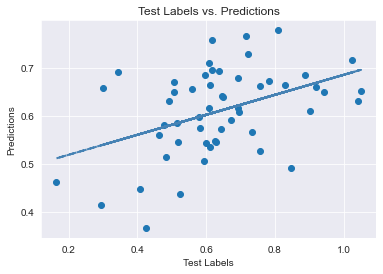

In [143]:
import scipy.stats as stats
# print(y_test.tolist())
# print(y_pred_list)
plt.plot(y_test.tolist(), y_pred_list, 'o')

a, b = np.polyfit(y_test.tolist(), y_pred_list, 1)
plt.plot(y_test, a*y_test+b, color='steelblue', linestyle='--', linewidth=2)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred_list)
print("Slope:", slope)
print("Intercept:", intercept)
print("R-Squared:", r_value**2)
print("P-Value:", p_value)
print("Standard Error:", std_err)
plt.xlabel('Test Labels')
plt.ylabel('Predictions')
plt.title('Test Labels vs. Predictions')
plt.show()
